# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import color
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from skimage import exposure
from skimage import filters
from skimage.filters import rank
from skimage import transform
from skimage import img_as_ubyte

from scipy import signal
from scipy.io import wavfile
from scipy import fftpack



Pretty printing has been turned OFF


## 2D - Discrete Fourier Transform
**1.1** Consider a syntetic image as following:

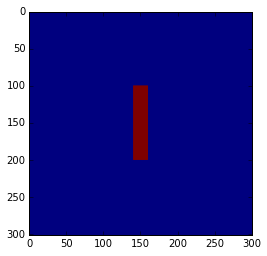

In [2]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 140:160] = 255

plt.figure()
plt.imshow(img)

**1.2** We can compute the FFT as follows:

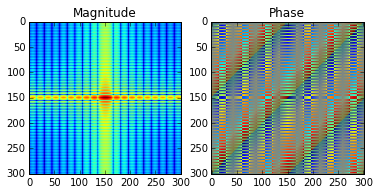

In [18]:
# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq)))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq))
ax2.set_title('Phase')


**1.3** Compute the FFT of translated, rotated and other verisons of the synthetic image and illustrate the magnitude and phase of the frequency response. 

Discuss your observations

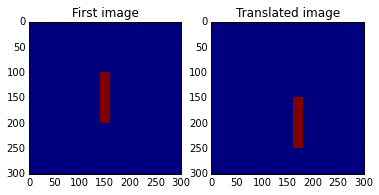

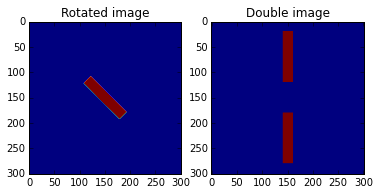

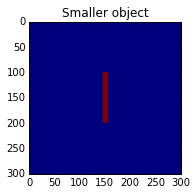

In [4]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 140:160] = 255

# Create a synthetic image
img_trans = np.zeros((301,301))
# Draw a rectangle inside
img_trans[150:250, 160:180] = 255

img_rot = transform.rotate(img, 45)

# Create a synthetic image
img2 = np.zeros((301,301))
# Draw a rectangle inside
img2[20:120, 140:160] = 255
img2[180:280, 140:160] = 255


# Create a synthetic image
img3 = np.zeros((301,301))
# Draw a rectangle inside
img3[100:200, 145:155] = 255

plt.figure
plt.subplot(121)
plt.imshow(img)
plt.title('First image')

plt.subplot(122)
plt.imshow(img_trans)
plt.title('Translated image')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(img_rot)
plt.title('Rotated image')

plt.subplot(122)
plt.imshow(img2)
plt.title('Double image')
plt.show()

plt.figure
plt.subplot(121)
plt.imshow(img3)
plt.title('Smaller object')
plt.show()


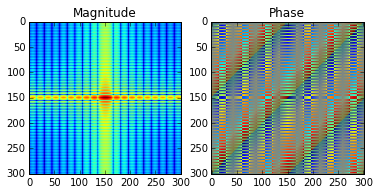

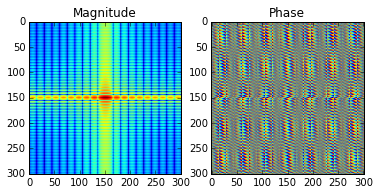

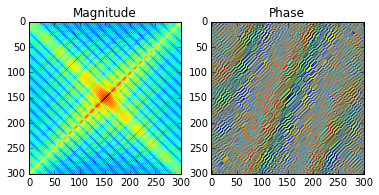

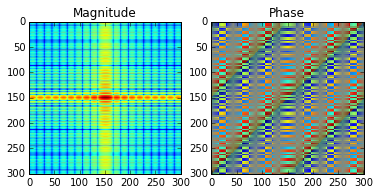

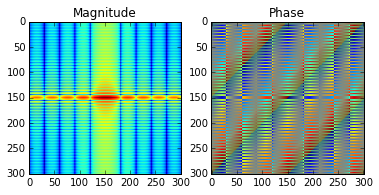

In [13]:


plt.figure
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(exposure.adjust_log(np.abs(np.fft.fftshift(np.fft.fft2(img)))))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(np.fft.fftshift(np.fft.fft2(img))))
ax2.set_title('Phase')



plt.figure
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(exposure.adjust_log(np.abs(np.fft.fftshift(np.fft.fft2(img_trans)))))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(np.fft.fftshift(np.fft.fft2(img_trans))))
ax2.set_title('Phase')


plt.figure
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(exposure.adjust_log(np.abs(np.fft.fftshift(np.fft.fft2(img_rot)))))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(np.fft.fftshift(np.fft.fft2(img_rot))))
ax2.set_title('Phase')


plt.figure
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(exposure.adjust_log(np.abs(np.fft.fftshift(np.fft.fft2(img2)))))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(np.fft.fftshift(np.fft.fft2(img2))))
ax2.set_title('Phase')


plt.figure
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(exposure.adjust_log(np.abs(np.fft.fftshift(np.fft.fft2(img3)))))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(np.fft.fftshift(np.fft.fft2(img3))))
ax2.set_title('Phase')

#On the first picture we can observe a direct correlation between the heigth of the rectangle and the width of the central FFT rectangle 
#(same with the width of the rectangle and the heigth of the fft rectangle)

#On the second picture we can observe that a translation left the magnitude unchanged but modify the phase. It is because
#while the phase represent the intensity (or the 'presence') of each frequencies, the phase represent theirs
#spatial implementation

#A rotated image while give a rotated magnitude (by pi/2)

#A double double image will double both the intensity of the magnitude and the intensity of the phase

#A thinner image will 'stretches' the magnitude and the phase along the axis thinner angles+pi/2

**1.4** Lets consider another synthetic image as follows, compute the phase and the magnitude of the followig image and display the normalized center frequency 

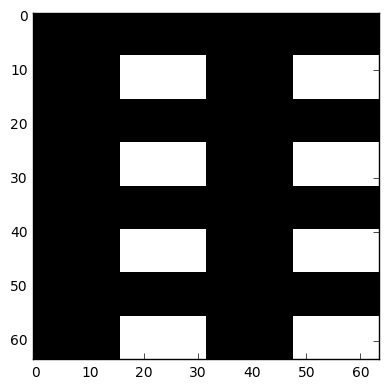

('central value of the FFT/number of points', 0.25)
('mean value of the image', 0.25)


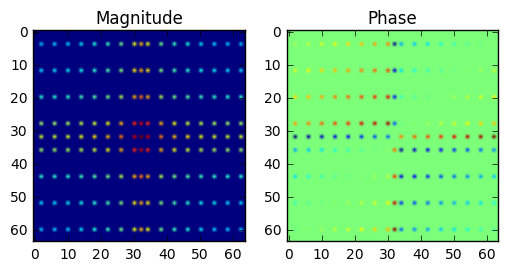

In [180]:
N = 64
Img = np.zeros((N,N))
# Length of the signal
T = 1. 
# Sampling period 
Ts = T/N 
Fs = 1./Ts
df = Fs/N
tem = np.ones((8,16))
Img[N/8:N/4, N/4:N/2] = tem 
Img[0:N/4,N/2:] = Img[0:N/4, :N/2]
Img[N/4:N/2,:] = Img[0:N/4 ,:]
Img[N/2:,:] = Img[0:N/2,:]


plt.figure
io.imshow(Img)
plt.show()



plt.figure
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(exposure.adjust_log(np.abs(np.fft.fftshift(np.fft.fft2(Img)))))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(np.fft.fftshift(np.fft.fft2(Img))))
ax2.set_title('Phase')

print('central value of the FFT/number of points',(np.abs(np.fft.fftshift(np.fft.fft2(Img))))[N/2,N/2]/(N*N))
print('mean value of the image',(np.mean(Img)))

#We can observe than the central value of the FFT/numbers of samples is the mean intensity of the image

**1.5** Plot $|I_{f}(u,0)|$ and $|I_{f}(0,v)|$ with the corrrect frequency range. 

Discuss your observations.


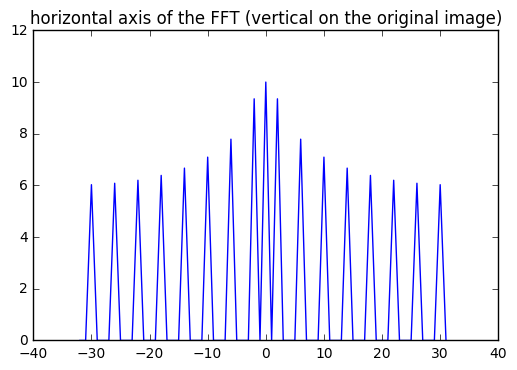

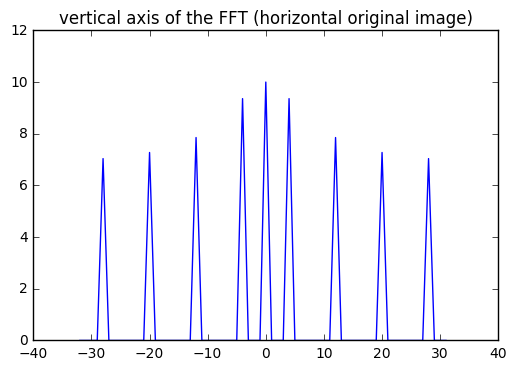

In [182]:
Img_freq=exposure.adjust_log(np.abs(np.fft.fftshift(np.fft.fft2(Img))))

hsf=0
vsf=0

#horizontal frequency axis

hsf=Img_freq[N/2,:]

t=np.arange(-N/2,N/2,1)
plt.figure
plt.plot(t,np.abs(hsf))
plt.title('horizontal axis of the FFT (vertical on the original image)')

vsf=Img_freq[:,N/2]
plt.figure()
plt.plot(t,np.abs(vsf))
plt.title('vertical axis of the FFT (horizontal original image)')

#We can observe that the the peak magnitude are the same in the center and decrease of the same amount peak to peak. 
#However the gap between each peak is proportional to the gap between each rectangle

**1.6** Load the `lena` image, and show its phase and its magnitude, then reconstruct the image using either frequency or phase. 

/home/masters/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
/home/masters/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
/home/masters/anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warnings.warn("Low image dynamic range; displaying image with "


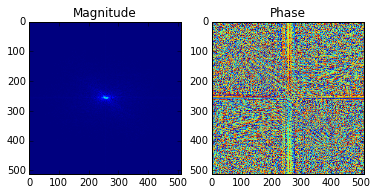

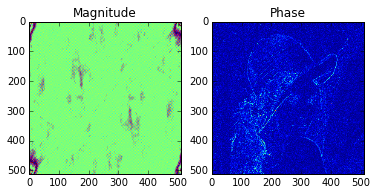

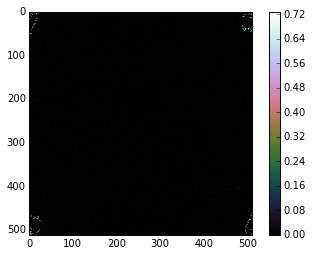

In [142]:
lena_im=io.imread('../images/lena-grey.bmp')
lena_im = img_as_ubyte(lena_im)

# Compute the DFT
img_freq2 = np.fft.fftshift(np.fft.fft2(lena_im))#/(lena_im.shape[0]*lena_im.shape[1])

[row,col]=lena_im.shape
Img_freq=np.fft.fft2(lena_im)
img_freq=Img_freq/(row*col)
img_freq=np.fft.fftshift(img_freq)
img_mag=np.abs(img_freq)
img_phase=np.angle(img_freq)

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq)))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq))
ax2.set_title('Phase')


img_phase=np.abs(np.fft.ifft2(np.exp(1j*img_phase)))
img_mag2=(np.fft.ifft2(np.abs(img_freq2)))



plt.figure
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(np.uint8(img_mag2))
ax1.set_title('Magnitude')
ax2.imshow(exposure.adjust_log(img_phase))
ax2.set_title('Phase')

#On the magnitude image we can faintly see the edges formed by the edges of the hat and the wooden as two white line

#We can clearly see that the phase represent the spatial repartition of the frequences while, by reconstructing with it we
#get the edge of the original image

#By applying a Sobel filter the magnitude we kept only the high frequency, thus those on the edge of the imshow




**1.7** Apply the sobel filter only in vertical direction to `lena` image in the frequency domain.

### Filtering in Frequency domain 

In order to build a frequency filter $H(u,v)$ from its spatial counterpart $h(x,y)$, we need to:

1. Build a zero padded spatial filter $h_p(x,y)$
1. Shift $h_p(x,y)$ by $(-1)^{x+y}$
1. Compute the DFT to obtain $H(u,v)$
1. Shift $H(u,v)$ by $(-1)^{x+y}$

In order to aboid the wraparound error, the image need to be zero padded

In order to perform the filtering, we need to:

1. Find the padded image size
1. Pad the image
1. Convert the spatial filter to frequency filter
1. Compute the DFT of the image with additional shift
1. Apply the multiplication in the Fourier space
1. Compute the inverse Fourier transform
1. Crop the image at its original size

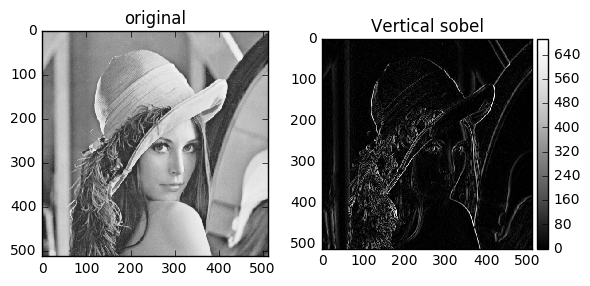

In [65]:

lena_im=io.imread('../images/lena-grey.bmp')


def Padding(Image,Xoffset,Yoffset ):
    
    heigth_im, width_im =Image.shape

    Padding_Im=np.zeros((heigth_im+Yoffset*2,width_im+Xoffset*2));

    for v in range(0,heigth_im):
        for h in range(0,width_im):
            Padding_Im[v+Yoffset][h+Xoffset]=Image[v][h]

    return np.uint8(Padding_Im)
        
        
def Shift(Image):
    
    heigth, width =Image.shape
    
    for v in range(0,heigth):
         for h in range(0,width):
            Shift[v,h] *=  Image[v,h]*np.power(-1, v+h)
    
    return Shift   

                
#pad lena
lena_im=Padding(lena_im,100,100)     
lena_imp=lena_im
heigth_lena, width_lena =lena_im.shape

#Create the filter
Filter = np.zeros((heigth_lena, width_lena))
sobel_vertical=np.array([[1, 0, -1],
                        [2, 0, -2],
                       [1, 0, -1]])

Filter[0:3, 0:3] = sobel_vertical


#do the filtering
lena_f=np.fft.fft2((lena_im))

Filter_f=np.fft.fft2((Filter))
Filter_f=(Filter_f)

Result_f=lena_f*Filter_f
Result_s=(np.fft.ifft2((Result_f)))



plt.figure
plt.subplot(121)

io.imshow(abs(lena_im[100:-100,100:-100]),cmap='Greys_r');
plt.title('original')

plt.subplot(122)
plt.title('Vertical sobel')
io.imshow(abs(Result_s[100:-100,100:-100]),cmap='Greys_r');

#As you can see I didn t used the Shifting as I don t shift lena either. This is due to the fact that lena and the filter
#will present the exact same shifting.In consequence shifting exactly the same way the two image will only be computaionaly
#costly.However we can approximate the operation made by the High pass Sobel filter as a putting a mask over the center
#of the image (if shifted) or on the corner (if not).
#To have the same result with shifting we would have needed to do :
                                                                    #FFT Shift of the image fft
                                                                    #Shift of the filter
                                                                    #Shift of the filter fft
                                                                    #IIFT Shift of the filter*image ifft
                
                #Remark : The fftShift  function is a function multiplying before and after the transfomation
                #the image by (-1)^(x+y)